# 필수과제3
- 이산형 확률분포와 연속형 확률분포의 각 개념과 파이썬 코드, 결과값에 대한 주석으로 설명
- 이산형 확률분포: 베르누이분포, 이항분포, 기하분포, 포아송 분포
- 연속형 확률분포: 정규분포, 카이제곱분포, 지수분포, t분포, F분포

## 이산형 확률분포
- 베르누이분포: 시행의 결과가 오직 두가지인 분포
- 이항분포: 베르누이 시행을 n번할 때, 사건이 발행한 횟수를 확률변수 x로 하는 확률분포
- 기하분포: 처음 성공이 나오기까지 시행한 횟수를 확률변수 x로 할 때의 확률분포
- 포아송분포: 단위 시간 안에 발생한 사건 횟수를 확률변수 x로 하는 확률분포 (이항분포에서 시행횟수가 무수히 많아지고, 발생확률은 아주 작은 경우)

### 베르누이 분포

In [33]:
import numpy as np
p = 0.3 #성공할 확률
q = 1-p #실패할 확률
E = p #기대값
V = p*q #분산
s = np.sqrt(V) #표준편차
print('[수기] 베르누이 분포의 기대값은 {:.3f}, 분산은 {:.3f}, 표준편차는 {:.3f}.'.format(E,V,s))

from scipy.stats import bernoulli
E, V = bernoulli.stats(p)
print('[패키지] 베르누이 분포의 기대값은 {:.3f}, 분산은 {:.3f}'.format(E,V))

[수기] 베르누이 분포의 기대값은 0.300, 분산은 0.210, 표준편차는 0.458.
[패키지] 베르누이 분포의 기대값은 0.300, 분산은 0.210


### 이항분포

In [34]:
from scipy.stats import binom
import numpy as np
from numpy.random import binomial #이항분포 샘플 만드는 함수
fac = np.math.factorial

# 근로자가 내년에 회사에서 일하지 않을 확률이 0.1이라고 추정한 경우,
# 시간제 근로자 3명을 무작위로 뽑았을 때 그 중 한명이 금년에 회사를 떠날 확률은?
n = 3 #근로자 샘플 개수
x = 1 #떠날 샘플 개수
p = 0.1 #떠날 확률

# 이항확률함수로 계산
pmf = fac(n)/fac(x)/fac(n-x) * p**x * (1-p)**(n-x)
E = n*p
V = n*p*(1-p)
print("[패키지] 이항분포 확률질량함수(pmf): ", binom.pmf(x,n,p))
print("[수기] 이항분포 확률질량함수(pmf): %.3f" %(pmf))
print("해당 사건의 평균(기대값)은 {:.3f}, 분산은 {:.3f}".format(E,V))

#1명 이하로 떠날 확률은?
print("[패키지] 이항분포 누적확률질량함수(cdf): ", binom.cdf(x,n,p))

cdf = 0
for i in range(0,x+1): # i = x = 0~1 확률변수의 확률값을 합함
    cdf += binom.pmf(i,n,p)
print("[수기] 이항분포 누적확률질량함수(cdf): ", cdf)

[패키지] 이항분포 확률질량함수(pmf):  0.243
[수기] 이항분포 확률질량함수(pmf): 0.243
해당 사건의 평균(기대값)은 0.300, 분산은 0.270
[패키지] 이항분포 누적확률질량함수(cdf):  0.972
[수기] 이항분포 누적확률질량함수(cdf):  0.972


### 기하분포

In [35]:
# 하나의 주사위를 세번 던질 때 세번째 시행에서 앞면 숫자가 6이 나올 확률은?
x = 3 #세번 시행
p = 1/6 #성공할 확률
q = 1-p #실패할 확률

pmf = q**(x-1) * p #확률질량함수 pmf
E = 1/p
V = q/(p)**2
print('[수기] pmf {:.3f}, 기대값은 {:.3f}, 분산은 {:.3f}'.format(pmf,E,V))

from scipy.stats import geom
E, V = geom.stats(p)
print('[패키지] pmf {:.3f}'.format(geom.pmf(x,p)))
print('기대값은 {:.3f}, 분산은 {:.3f}'.format(E,V))

# 타율 0.35인 야구 선수가 2타석이내에 안타를 칠 확률은?
result = 0
x = 2
for x in range(1,x+1): #1,2타석에서 안타를 칠 확률
    p = 0.35
    q = 1-p
    pmf = q**(x-1)*p
    result+=pmf
print('[수기] 2타석 이내 안타 칠 확률 {:.3f}'.format(result))

result = geom.cdf(x,p)
print('[패키지] 2타석 이내 안타 칠 확률 {:.3f}'.format(result))

[수기] pmf 0.116, 기대값은 6.000, 분산은 30.000
[패키지] pmf 0.116
기대값은 6.000, 분산은 30.000
[수기] 2타석 이내 안타 칠 확률 0.577
[패키지] 2타석 이내 안타 칠 확률 0.577


### 포아송 분포

In [36]:
# 단위 시간/공간에서 발생하는 횟수는 다른 시간/공간에 대해 서로 독립
# 단위 시간/공간에서 사건의 평균출현횟수는 일정
# 극히 작은 단위시간/공간에서 둘 이상의 사건이 일어날 가능성이 없어야 함
from scipy.stats import poisson
import numpy as np
from numpy.random import poisson as np_poisson
# 1시간동안 전화 교환 시스템에 신청횟수, 옷감 1제곱미터 당 결점 수, 1년 동안 화재 발행횟수, 시간 당 은행창구에 도착하는 고객 수 등
# 주말 저녁 시간 당 평균 6명이 응급실 올 경우, 어떤 주말 저녁 30분 내 4명이 도착할 확률은?
x = 4 #구간 내 사건 개수
mu = 3 #구간 내 평균 사건 개수 (=lambda)

pmf = mu**x * np.exp(-mu)/np.math.factorial(x)
E = mu
V = mu
print('[패키지] 포아송분포 확률질량함수(pmf): ', poisson.pmf(x,mu))
print('[수기] 포아송분포 확률질량함수(pmf): ', pmf)
print('해당 사건의 기대값은 {:.3f}, 분산은 {:.3f}'.format(E,V))
#포아송 분포의 평균과 분산은 동일

# 4명 이하로 도착할 확률은?
print('[패키지] 포아송분포 누적확률질량함수(cdf): ', poisson.cdf(x,mu))
cdf = 0
for x in range(0,x+1): # 0~4 확률변수의 확률값을 모두 합함
    cdf += poisson.pmf(i,mu)
print('[수기] 포아송분포 누적확률질량함수(cdf): ', cdf)

[패키지] 포아송분포 확률질량함수(pmf):  0.16803135574154085
[수기] 포아송분포 확률질량함수(pmf):  0.16803135574154082
해당 사건의 기대값은 3.000, 분산은 3.000
[패키지] 포아송분포 누적확률질량함수(cdf):  0.8152632445237722
[수기] 포아송분포 누적확률질량함수(cdf):  0.7468060255179593


## 연속형 확률분포
- 정규분포: 수집된 자료의 분포를 근사하는데에 자주 사용되며, 이것은 중심극한정리에 의하여 독립적인 확률변수들의 평균은 정규분포에 가까워지는 성질이 있기 때문이다. 특히 평균이 0이고 표준편차가 1인 정규분포는 표준정규본포라고 한다.
- 카이제곱분포: p개의 서로 독립적인 표준정규 확률변수를 각각 제곱한 다음 합해서 얻어지는 분포이다. 이때 p를 자유도라고 하며, 카이제곱분포의 매개변수가 된다. 카이제곱분포는 신뢰구간이나 가설검정 등의 모델에서 자주 등장한다.
- 지수분포: 사건이 서로 독립적일 때, 일정 시간 동안 발생하는 사건의 횟수가 포아송분포를 따른달면, 다음 사건이 일어날 때까지의 대기 시간은 지수분포를 따른다. 이는 기하분포와 유사한 측면이 있다.
- t분포: 순전히 평균 검정을 하기 위해 고안된 분포이다. 정규분포와 다르게 모분산을 포함하고 있지 않다. 이는 표본 수가 적을 때 신뢰성을 더해준다.
- F분포: 카이제곱들의 비(ratio)가 따르는 분포이다. 카이제곱들의 비는 두 변동을 비교하기 위해 사용되는 것으로, 이 역시 자료 수와 관련된 자유도가 반영된다.

### 정규분포

In [38]:
# x가 정규분포 N(mu, S^2) = (30, 8^2)를 따를 때 26~46의 확률은?
from scipy.stats import norm
mu = 30
S = 8
x1 = 26
x2 = 46
zstat1 = (x1-mu)/S
zstat2 = (x2-mu)/S
p = norm.cdf(zstat2) - norm.cdf(zstat1)

print("검정통계량은 {:.3f}~{:.3f}이고, 확률은 {:.3f}이다".format(zstat1, zstat2, p))

검정통계량은 -0.500~2.000이고, 확률은 0.669이다


### 카이제곱분포

- 자유도
- 열변수: 당뇨, 정상
- 행변수: 비만, 정상체증, 저체증

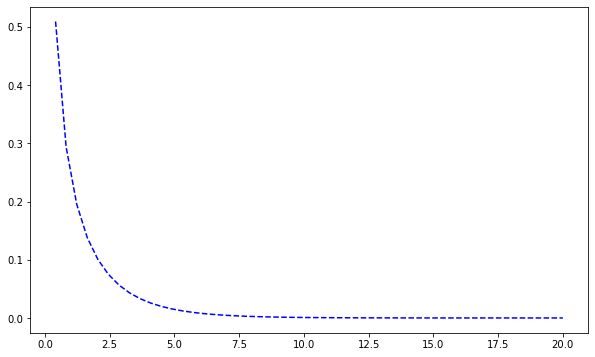

In [39]:
from numpy import linspace
from scipy.stats import chi2

df = 1          # 자유도
x = linspace(0, 20, 50)
y = chi2(df).pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b--')

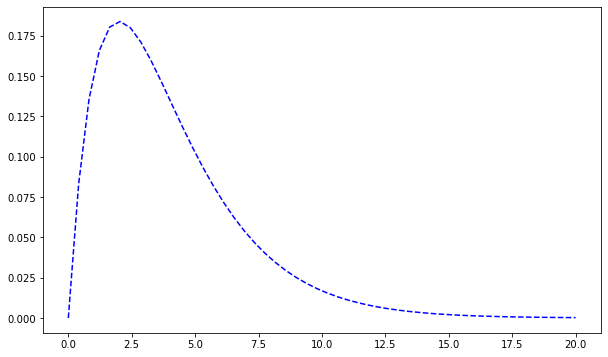

In [40]:
df = 4          # 자유도
x = linspace(0, 20, 50)
y = chi2(df).pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b--')

In [41]:
# 자유도에 따라서 카이스퀘어 분포가 변화한다. 자유도가 증가할수록 카이스퀘어 분포는 정규분포에 가까워진다.

### 지수분포

In [42]:
# 제품의 수명시간, 상점에서 고객이 한 사람 나간 후에 새로운 고객이 들어올 때까지 걸리는 시간, 은행창구의 고객당 서비스 시간 등
# 단위 시간 당 발생하는 평균 사건수를 lambda, 확률변량 X를 발생하는 사건들 사이의 시간
from scipy.stats import expon
from numpy.random import exponential

# 자동차들 사이 시간 간격이 평균 3분인 지수확률 분포를 따르는 경우,
# 연속한 두대의 차량이 도착하는 시간이 2분 이내일 확률은? (누적확률밀도함수)
x = 2 # x는 항상 양수이다!!
mu = 3 # lambda=1/3: 3분동안 1건 발생

E = mu #1/lambda
V = mu**2 #1/lambda**2
cdf = 1 - np.exp(-x/mu)
print('[패키지] 지수분포 누적확률질량함수(cdf): ', expon.cdf(x,scale=mu))
print('[수기] 지수분포 누적확률질량함수(cdf): ', cdf)
print('해당 사건의 기대값은 {}, 분산은 {}'.format(E,V), "\n")

[패키지] 지수분포 누적확률질량함수(cdf):  0.486582880967408
[수기] 지수분포 누적확률질량함수(cdf):  0.486582880967408
해당 사건의 기대값은 3, 분산은 9 



### t분포

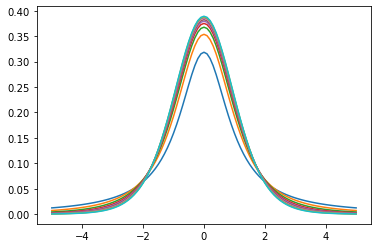

In [43]:
import numpy as np
X = np.linspace(-5,5,101)

#자유도에 따라 t-분포를 그려보면
import matplotlib.pyplot as plt
from scipy.stats import t
for i in np.arange(10)+1:
    plt.plot(X,t(i).pdf(X))

In [44]:
# 이러한 결과를 볼 수 있다.

### F분포

In [45]:
# library 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 카이제곱 리스트 연산 함수
# 1000번 시행
def normal(inp):
    result = []
    for i in range(1,1001):
        tmp = np.random.normal(size = inp)
        dummy = 0
        for i in range(inp):
            tmp2  = tmp[i] ** 2
            dummy += tmp2
        result.append(dummy)
    return result

# F 값 연산 함수
def f(inp1, inp2):
    result1 = np.array(normal(inp1)) / inp1
    result2 = np.array(normal(inp2)) / inp2
    result = result1 / result2
    return result

# 데이터 프레임화
def make_group(inp):
    num_0 = 0
    num_1 = 0
    num_2 = 0
    num_3 = 0
    num_4 = 0
    num_5 = 0
    num_6 = 0
    num_7 = 0
    num_8 = 0
    num_9 = 0
    num_10 = 0
    num_11 = 0
    num_12 = 0
    num_13 = 0
    num_14 = 0
    num_15 = 0
    num_16 = 0
    num_17 = 0
    num_18 = 0
    num_19 = 0
    num_20 = 0
    for i in inp:
        if i >= 20:
            num_20 += 1
        elif i >= 19:
            num_19 += 1
        elif i >= 18:
            num_18 += 1
        elif i >= 17:
            num_17 += 1
        elif i >= 16:
            num_16 += 1
        elif i >= 15:
            num_15 += 1
        elif i >= 14:
            num_14 += 1
        elif i >= 13:
            num_13 += 1
        elif i >= 12:
            num_12 += 1
        elif i >= 11:
            num_11 += 1
        elif i >= 10:
            num_10 += 1
        elif i >= 9:
            num_9 += 1
        elif i >= 8:
            num_8 += 1
        elif i >= 7:
            num_7 += 1
        elif i >= 6:
            num_6 += 1
        elif i >= 5:
            num_5 += 1
        elif i >= 4:
            num_4 += 1
        elif i >= 3:
            num_3 += 1
        elif i >= 2:
            num_2 += 1
        elif i >= 1:
            num_1 += 1
        elif i >= 0:
            num_0 += 1
    result = pd.DataFrame({
        'standard' : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 'over20'],
        'result' : [num_0, num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8, num_9, num_10,
                   num_11, num_12, num_13, num_14, num_15, num_16, num_17, num_18, num_19, num_20]
    })
    return result

<BarContainer object of 21 artists>

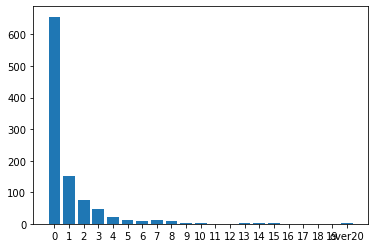

In [46]:
# 결과
# F(1,10)
result = make_group(f(1, 10))
plt.bar(result['standard'], result['result'])

<BarContainer object of 21 artists>

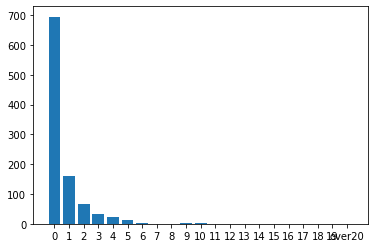

In [47]:
# F(1,1000)
result = make_group(f(1, 1000))
plt.bar(result['standard'], result['result'])

<BarContainer object of 21 artists>

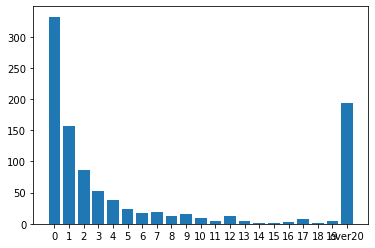

In [48]:
# F(10,1)
result = make_group(f(10, 1))
plt.bar(result['standard'], result['result'])

<BarContainer object of 21 artists>

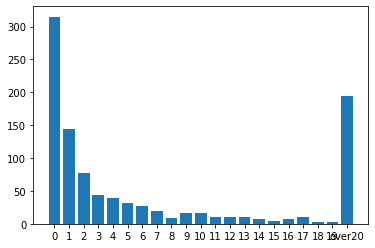

In [49]:
# F(1000,1)
result = make_group(f(1000, 1))
plt.bar(result['standard'], result['result'])

<BarContainer object of 21 artists>

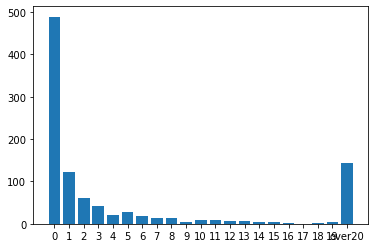

In [50]:
# F(1,1)
result = make_group(f(1, 1))
plt.bar(result['standard'], result['result'])

<BarContainer object of 21 artists>

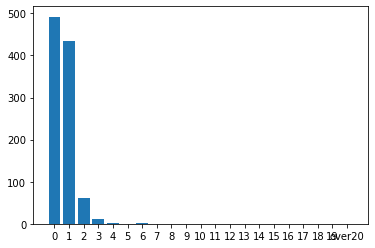

In [51]:
# F(20,20)
result = make_group(f(20, 20))
plt.bar(result['standard'], result['result'])

<BarContainer object of 21 artists>

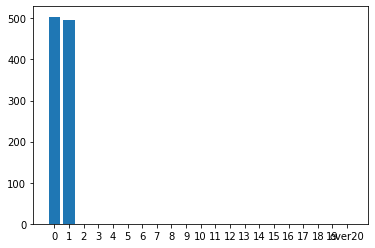

In [52]:
# F(1000,1000)
result = make_group(f(1000, 1000))
plt.bar(result['standard'], result['result'])